In [2]:
import pandas as pd
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Define the number of samples
num_samples = 1000

# Generate random values for the features
distance = np.random.randint(50, 2000, size=num_samples)  # Distance in kilometers
delivery_urgency = np.random.randint(1, 6, size=num_samples)  # Urgency scale 1-5
cargo_type = np.random.choice(['Perishable', 'Non-perishable', 'Fragile', 'Bulk'], size=num_samples)
market_conditions = np.random.uniform(0, 1, size=num_samples)  # Market conditions scale 0-1

# Generate a price based on the features (this is a simplistic formula for demonstration)
price = (distance * 0.5) + (delivery_urgency * 20) + (market_conditions * 100) + \
        np.where(cargo_type == 'Perishable', 50, 0) + \
        np.where(cargo_type == 'Non-perishable', 30, 0) + \
        np.where(cargo_type == 'Fragile', 70, 0) + \
        np.where(cargo_type == 'Bulk', 10, 0) + \
        np.random.normal(0, 25, size=num_samples)  # Adding some noise

# Create a DataFrame
data = pd.DataFrame({
    'Distance': distance,
    'Delivery_Urgency': delivery_urgency,
    'Cargo_Type': cargo_type,
    'Market_Conditions': market_conditions,
    'Price': price
})

# Display the first few rows of the dataset
print(data.head())

# Save the dataset to a CSV file
data.to_csv('synthetic_logistics_data.csv', index=False)



   Distance  Delivery_Urgency      Cargo_Type  Market_Conditions       Price
0      1176                 3  Non-perishable           0.381940  731.656173
1      1509                 3            Bulk           0.205687  839.881788
2       910                 1         Fragile           0.121386  572.854273
3      1344                 5            Bulk           0.615013  811.766417
4      1180                 1      Perishable           0.774634  720.071594


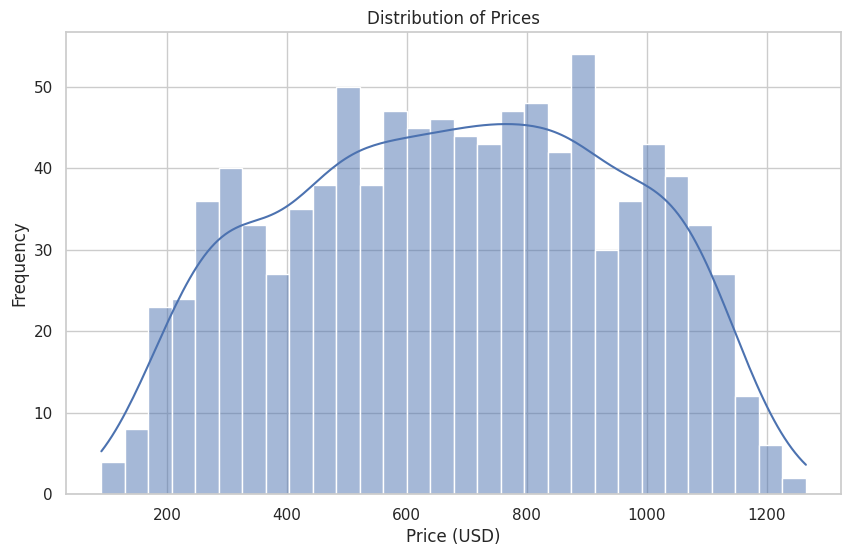

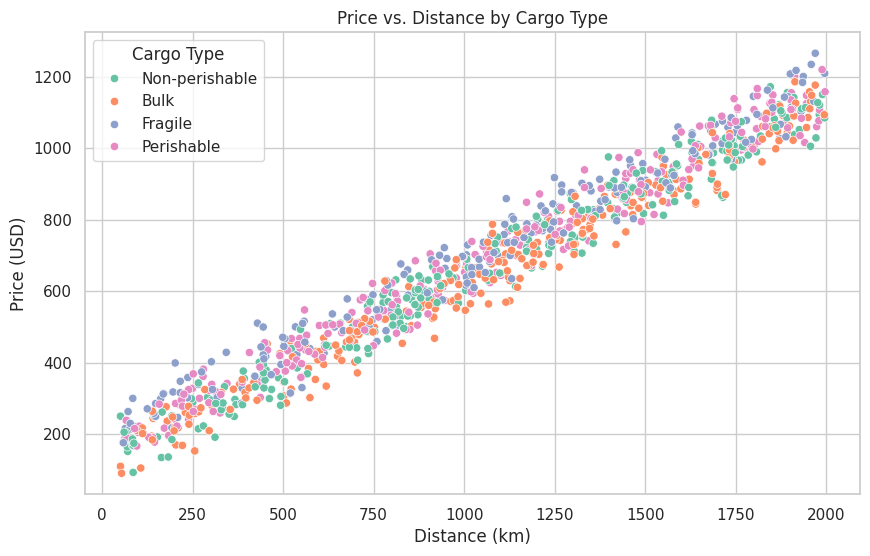

<ipython-input-4-2085f7893995>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Delivery_Urgency', y='Price', data=data, palette='Set3')


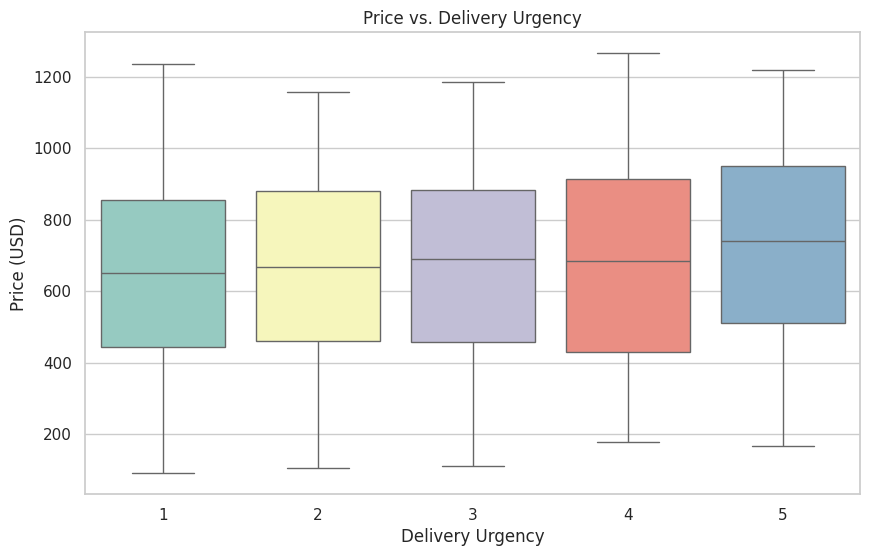

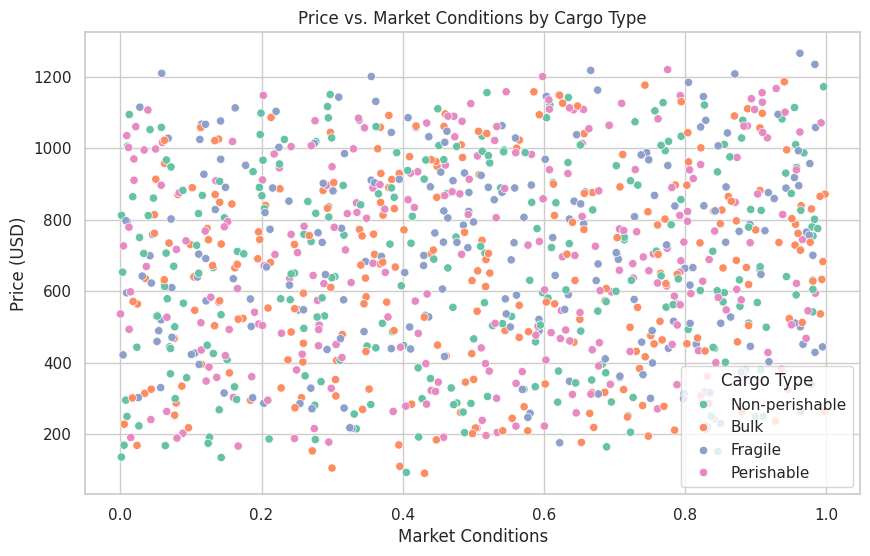

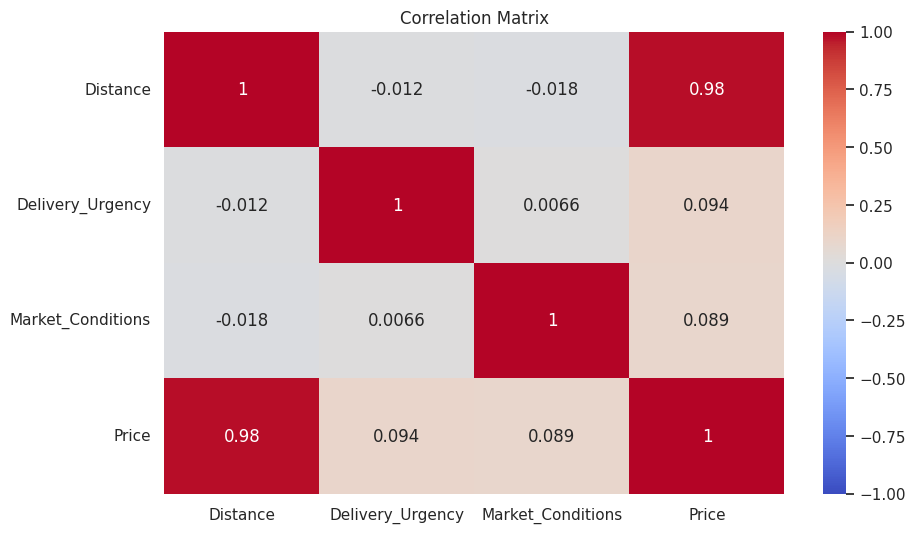

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('synthetic_logistics_data.csv')

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot 1: Distribution of Prices
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

# Plot 2: Price vs. Distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance', y='Price', data=data, hue='Cargo_Type', palette='Set2')
plt.title('Price vs. Distance by Cargo Type')
plt.xlabel('Distance (km)')
plt.ylabel('Price (USD)')
plt.legend(title='Cargo Type')
plt.show()

# Plot 3: Price vs. Delivery Urgency
plt.figure(figsize=(10, 6))
sns.boxplot(x='Delivery_Urgency', y='Price', data=data, palette='Set3')
plt.title('Price vs. Delivery Urgency')
plt.xlabel('Delivery Urgency')
plt.ylabel('Price (USD)')
plt.show()

# Plot 4: Price vs. Market Conditions
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Market_Conditions', y='Price', data=data, hue='Cargo_Type', palette='Set2')
plt.title('Price vs. Market Conditions by Cargo Type')
plt.xlabel('Market Conditions')
plt.ylabel('Price (USD)')
plt.legend(title='Cargo Type')
plt.show()

# Plot 5: Correlation Matrix
plt.figure(figsize=(10, 6))
# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=['float', 'int'])
corr = numerical_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()



In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('synthetic_logistics_data.csv')

# One-hot encode the Cargo_Type column
data = pd.get_dummies(data, columns=['Cargo_Type'], drop_first=True)

# Define the feature variables (X) and the target variable (y)
features = ['Distance', 'Delivery_Urgency', 'Market_Conditions',
            'Cargo_Type_Fragile', 'Cargo_Type_Non-perishable', 'Cargo_Type_Perishable']
X = data[features]
y = data['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='r2')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [9]:
# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R^2 Scores: {cv_scores}")
print(f"Mean Cross-Validation R^2 Score: {np.mean(cv_scores)}")

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the model on the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test Set Mean Squared Error: {mse}")
print(f"Test Set R^2 Score: {r2}")

# Example prediction (replace with actual data for prediction)
new_data = pd.DataFrame({
    'Distance': [1200],
    'Delivery_Urgency': [3],
    'Market_Conditions': [0.6],
    'Cargo_Type_Fragile': [0],
    'Cargo_Type_Non-perishable': [0],
    'Cargo_Type_Perishable': [1]
})

# Standardize the new data
new_data = scaler.transform(new_data)

# Make prediction
predicted_price = best_rf.predict(new_data)
print(f"Predicted Price: {predicted_price[0]} USD")


Cross-Validation R^2 Scores: [0.98306794 0.98368178 0.97623042 0.98512402 0.98251466]
Mean Cross-Validation R^2 Score: 0.9821237670775517
Test Set Mean Squared Error: 1042.9916188224172
Test Set R^2 Score: 0.9856354010124625
Predicted Price: 759.1690289299852 USD
